In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
connect = sqlite3.connect('dinofunworld.db')

checkins_df = pd.read_sql_query("SELECT * FROM checkin", connect)
attractions_df = pd.read_sql_query("SELECT * FROM attraction", connect)
sequences_df = pd.read_sql_query("SELECT * FROM sequences", connect)

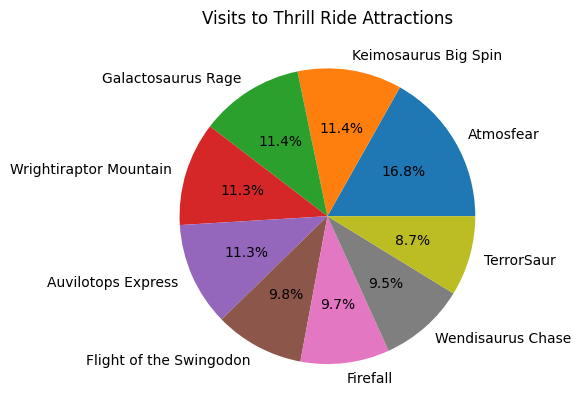

In [36]:
# Chart 1: A Pie Chart depicting visits to thrill ride attractions

# Strip the extra carriage return character from the 'Category' column
attractions_df['Category'] = attractions_df['Category'].str.strip()

thrill_rides = attractions_df[attractions_df['Category'] == 'Thrill Rides']
thrill_checkins = checkins_df[checkins_df['attraction'].isin(thrill_rides['AttractionID'])]
thrill_counts = thrill_checkins['attraction'].value_counts()

attraction_id_to_name = attractions_df.set_index('AttractionID')['Name'].to_dict()
thrill_counts.index = thrill_counts.index.map(attraction_id_to_name)

plt.pie(thrill_counts, labels=thrill_counts.index, autopct="%1.1f%%")
plt.title("Visits to Thrill Ride Attractions")
plt.show()

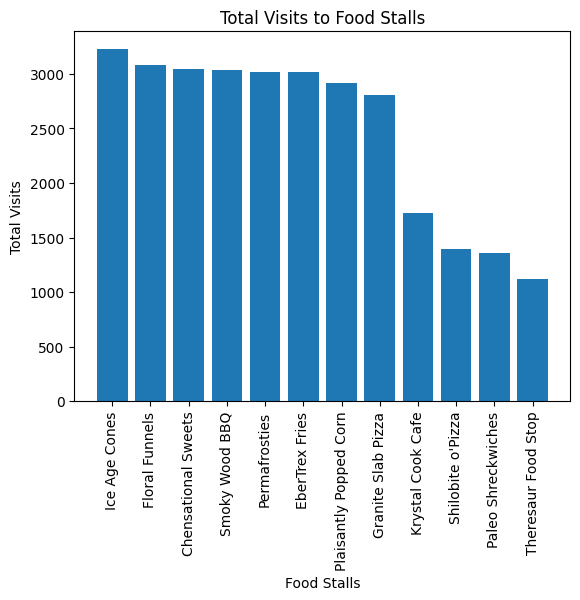

In [41]:
# Chart 2: A Bar Chart depicting total visits to food stalls
food_stalls = attractions_df[attractions_df['Category'] == 'Food']
food_checkins = checkins_df[checkins_df['attraction'].isin(food_stalls['AttractionID'])]
food_counts = food_checkins['attraction'].value_counts()

attraction_id_to_name = attractions_df.set_index('AttractionID')['Name'].to_dict()
food_counts.index = food_counts.index.map(attraction_id_to_name)

plt.bar(food_counts.index, food_counts)
plt.xlabel("Food Stalls")
plt.xticks(rotation=90)
plt.ylabel("Total Visits")
plt.title("Total Visits to Food Stalls")
plt.show()

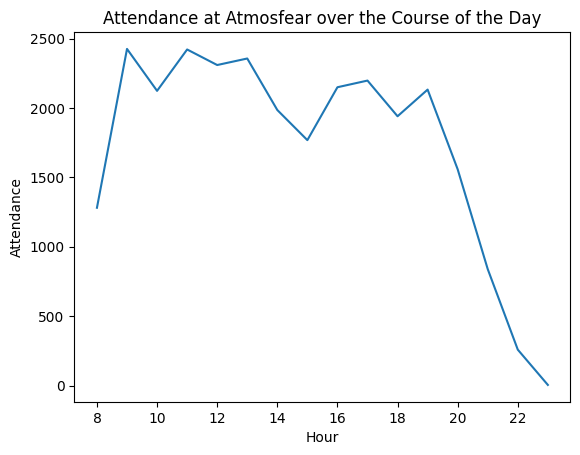

In [40]:
# Chart 3: A Line Chart depicting attendance at the newest ride, Atmosfear over the course of the day
atmosfear_id = attractions_df[attractions_df['Name'] == 'Atmosfear']['AttractionID'].values[0]
atmosfear_checkins = checkins_df[checkins_df['attraction'] == atmosfear_id].copy()
atmosfear_checkins['hour'] = pd.to_datetime(atmosfear_checkins['timestamp']).dt.hour
hourly_counts = atmosfear_checkins.groupby('hour').size()

plt.plot(hourly_counts.index, hourly_counts)
plt.xlabel("Hour")
plt.ylabel("Attendance")
plt.title("Attendance at Atmosfear over the Course of the Day")
plt.show()

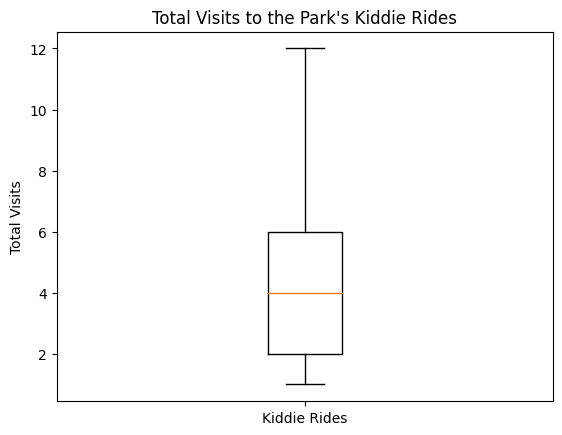

In [46]:
# Chart 4: A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides
kiddie_rides = attractions_df[attractions_df['Category'] == 'Kiddie Rides']
kiddie_checkins = checkins_df[checkins_df['attraction'].isin(kiddie_rides['AttractionID'])]
kiddie_counts = kiddie_checkins.groupby('visitorID').size()

plt.boxplot(kiddie_counts, showfliers=False)
plt.ylabel("Total Visits")
plt.title("Total Visits to the Park's Kiddie Rides")
plt.xticks([1], ['Kiddie Rides'])
plt.show()